<a href="https://colab.research.google.com/github/SahithiReddyMallidi/Data-Analytics-Projects/blob/main/GoogleTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_tesla=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/TESLA Search Trend vs Price.csv')
df_tesla.shape
df_tesla.head()
df_tesla.TSLA_WEB_SEARCH.describe()

,TSLA_WEB_SEARCH
count,124.000000
mean,8.725806
std,5.870332
min,2.000000
25%,3.750000
50%,8.000000
75%,12.000000
max,31.000000


In [ ]:
import pandas as pd
df_unemployment=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/UE Benefits Search vs UE Rate 2004-19.csv')
df_unemployment.shape
df_unemployment.head()
df_unemployment.UE_BENEFITS_WEB_SEARCH.describe()

,UE_BENEFITS_WEB_SEARCH
count,181.000000
mean,35.110497
std,20.484925
min,14.000000
25%,21.000000
50%,26.000000
75%,45.000000
max,100.000000


In [ ]:
import pandas as pd
df_bitcoinSearch=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Bitcoin Search Trend.csv')
df_bitcoinSearch.shape
df_bitcoinSearch.head()
df_bitcoinSearch.BTC_NEWS_SEARCH.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [ ]:
import pandas as pd
df_bitcoinPrice=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Daily Bitcoin Price.csv')
df_bitcoinPrice.shape
df_bitcoinPrice.head()
df_bitcoinPrice.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [ ]:
import pandas as pd

df_tesla=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/TESLA Search Trend vs Price.csv')
df_unemployment=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/UE Benefits Search vs UE Rate 2004-19.csv')
df_bitcoinSearch=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Bitcoin Search Trend.csv')
df_bitcoinPrice=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Daily Bitcoin Price.csv')

print(f'df_tesla NaN values?{df_tesla.isna().values.any()}')
print(f'df_unemployment NaN values?{df_unemployment.isna().values.any()}')
print(f'df_bitcoinSearch NaN values?{df_bitcoinSearch.isna().values.any()}')
print(f'df_bitcoinPrice NaN values?{df_bitcoinPrice.isna().values.any()}')

df_bitcoinPrice=df_bitcoinPrice.dropna()

df_tesla.MONTH=pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH=pd.to_datetime(df_unemployment.MONTH)
df_bitcoinSearch.MONTH=pd.to_datetime(df_bitcoinSearch.MONTH)
df_bitcoinPrice.DATE=pd.to_datetime(df_bitcoinPrice.DATE)
df_btc_price_montly=df_bitcoinPrice.resample('M',on='DATE').last()
df_bitcoinSearch.shape
df_btc_price_montly.shape


df_tesla NaN values?False
df_unemployment NaN values?False
df_bitcoinSearch NaN values?False
df_bitcoinPrice NaN values?True


(73, 2)

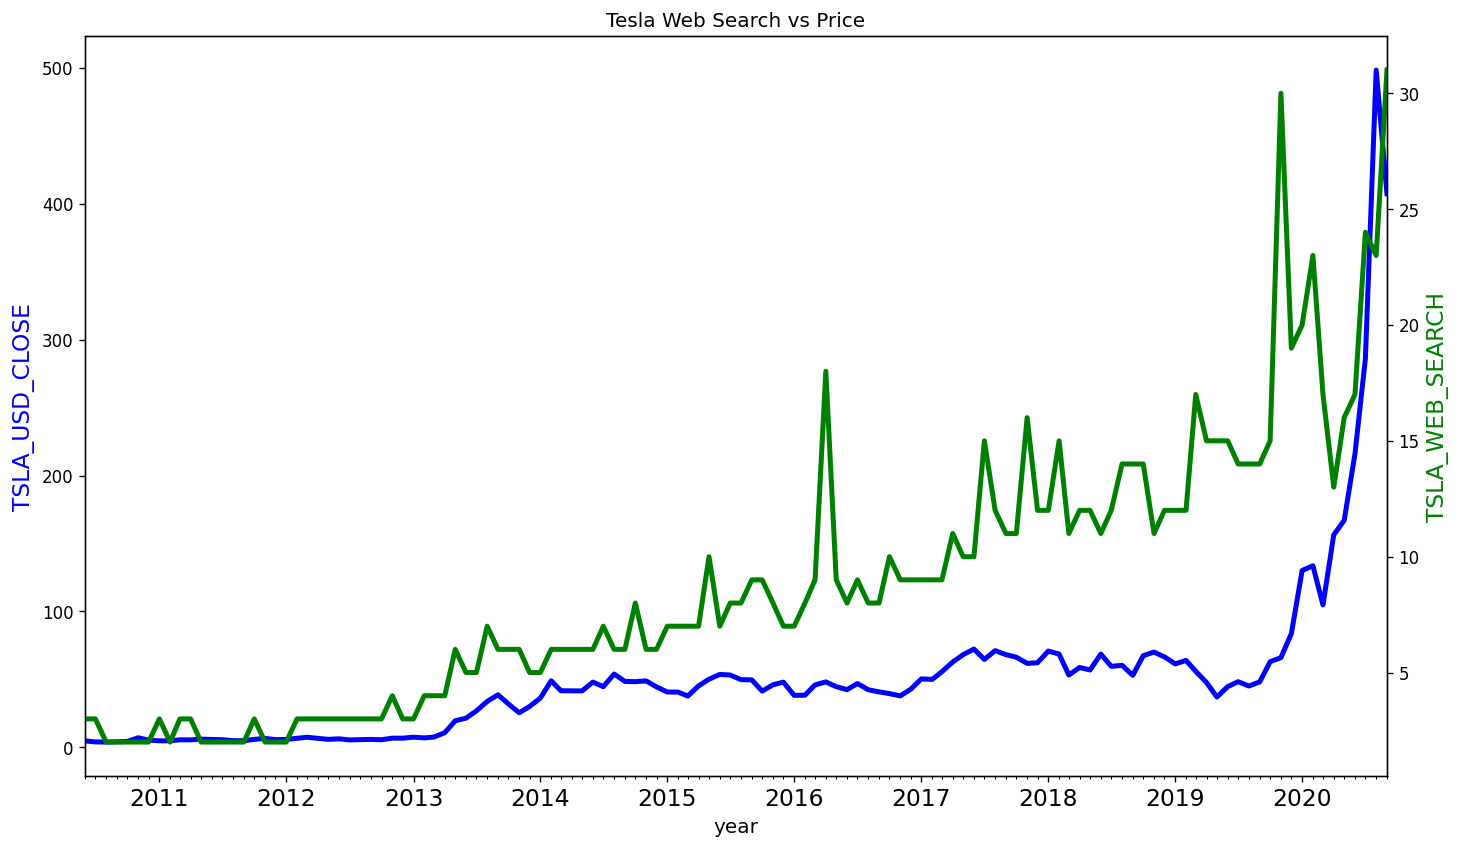

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df_tesla=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/TESLA Search Trend vs Price.csv')
df_tesla.MONTH=pd.to_datetime(df_tesla.MONTH)
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price')
plt.xlabel('year',fontsize=12)
plt.xticks(fontsize=14)
ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_ylabel('TSLA_USD_CLOSE',color='b',fontsize=14)
ax2.set_ylabel('TSLA_WEB_SEARCH',color='g',fontsize=14)
ax1.set_xlim(df_tesla.MONTH.min(),df_tesla.MONTH.max())
ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE,color='b',linewidth=3)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH,color='g',linewidth=3)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()



     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5
        DATE       CLOSE      VOLUME
0 2014-09-17  457.334015  21056800.0
1 2014-09-18  424.440002  34483200.0
2 2014-09-19  394.795990  37919700.0
3 2014-09-20  408.903992  36863600.0
4 2014-09-21  398.821014  26580100.0


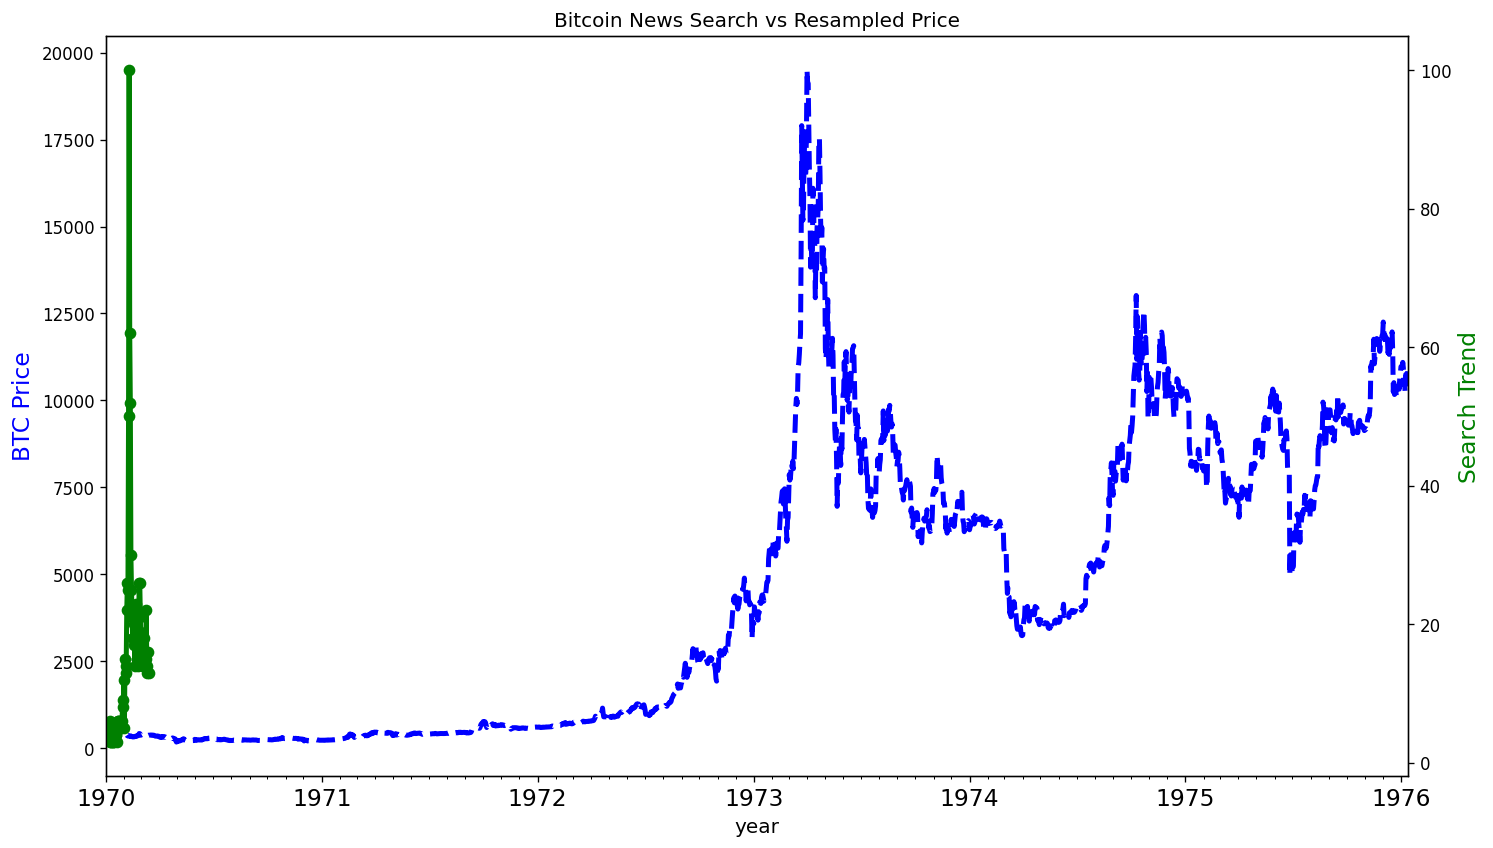

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df_btc_search=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Bitcoin Search Trend.csv')
df_btc_price=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Daily Bitcoin Price.csv')
df_btc_price.DATE=pd.to_datetime(df_btc_price.DATE)
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price')
plt.xlabel('year',fontsize=12)
plt.xticks(fontsize=14)
ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_ylabel('BTC Price',color='b',fontsize=14)
ax2.set_ylabel('Search Trend',color='g',fontsize=14)
ax1.set_xlim(df_btc_price.index.min(),df_btc_price.index.max())
print(df_btc_search.head())
print(df_btc_price.head())
ax1.plot(df_btc_price.index,df_btc_price.CLOSE,color='b',linewidth=3, linestyle='--')
ax2.plot(df_btc_search.index,df_btc_search.BTC_NEWS_SEARCH,color='g',linewidth=3, marker='o')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()
